In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import joblib # Note: require sklearn v0.22+ (to update sklearn: pip install -U scikit-learn ). For old version sklearn: from sklearn.externals import joblib 
from sklearn.linear_model import SGDClassifier   
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import f1_score

In [2]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

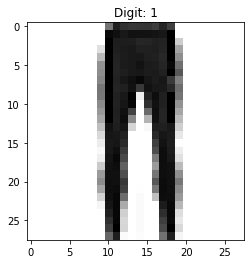

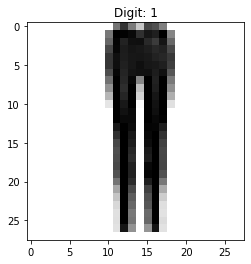

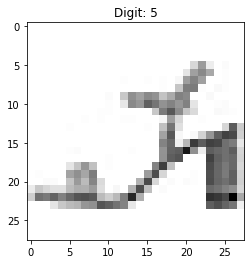

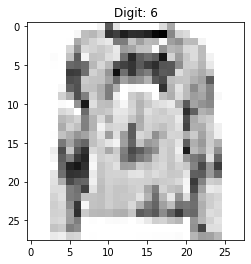

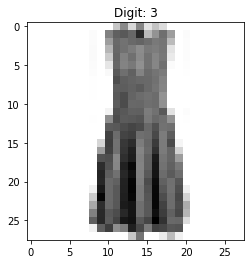

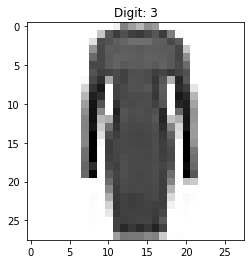

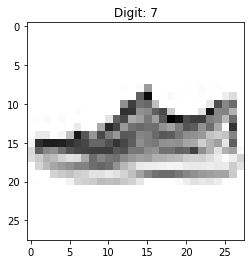

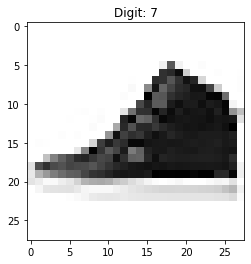

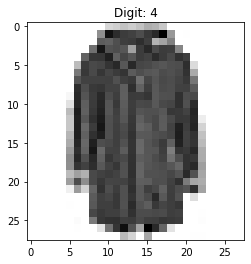

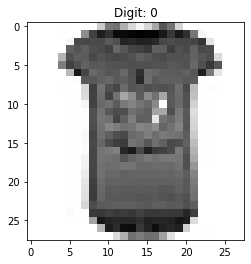

In [5]:
# 1.3. Plot a digit image  
import random 
def plot_digit(data, label = 'unspecified', showed=True):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.title("Digit: " + str(label))
    #plt.axis("off")
    if showed:
        plt.show()
for i in range(10): 
    sample_id = random.randint(1, 1000)
    plot_digit(X_train[sample_id], y_train[sample_id])


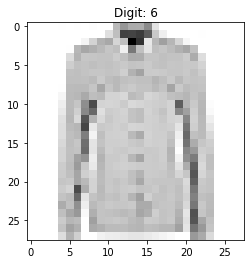

In [6]:
# 1.3. Plot a digit image  
import random 
def plot_digit(data, label = 'unspecified', showed=True):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.title("Digit: " + str(label))
    #plt.axis("off")
    if showed:
        plt.show()
 
sample_id = 8037
plot_digit(X_train[sample_id], y_train[sample_id])

In [7]:
y_train_6 = (y_train == 6) 
y_test_6 = (y_test == 6)



In [15]:
randomForest = True
rfc_clf = RandomForestClassifier(random_state=30)
if randomForest:
  rfc_clf.fit(X_train, y_train_6)
  joblib.dump(rfc_clf,'saved_var/rfc_binary')
else:
  rfc_clf = joblib.load('saved_var/rfc_binary')

In [16]:
import random
# Predict a sample:
for i in range(100): 
    sample_id = random.randint(1, 9999)
    if rfc_clf.predict([X_train[sample_id]]):
        print(sample_id)
        print(rfc_clf.predict([X_train[sample_id]]))


5170
[ True]
2798
[ True]
2719
[ True]
4451
[ True]
5146
[ True]
3925
[ True]
2579
[ True]
5798
[ True]
809
[ True]
8215
[ True]
8578
[ True]


In [17]:
trueList = []
count = 0
for i in range(0, 50000):
  if(y_train_6[i] == True):
    trueList.append([y_train_6[i], i])
    count += 1


In [18]:
count

5030

In [19]:
# In[3]: PERFORMANCE MEASURES 
# 3.1. Accuracy (with cross-validation) of SGDClassifier 
from sklearn.model_selection import cross_val_score
# Warning: takes time for new run! 
new_run = True
if new_run == True:
    accuracies = cross_val_score(rfc_clf, X_train, y_train_6, cv=3, scoring="accuracy")
    joblib.dump(accuracies,'saved_var/rfc_clf_binary_acc')
else:
    accuracies = joblib.load('saved_var/rfc_clf_binary_acc')

# 3.2. Accuracy of a dump classifier
# Note: We are having an IMBALANCED data, hence accuracy is not useful!
from sklearn.base import BaseEstimator
class DumpClassifier(BaseEstimator): # always return False (not-5 label)
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
no_6_model = DumpClassifier()
cross_val_score(no_6_model, X_train, y_train_6, cv=3, scoring="accuracy")

array([0.8966, 0.9001, 0.9033])

In [113]:
print(accuracies)
print(cross_val_score(no_6_model, X_train, y_train_6, cv=3, scoring="accuracy"))

[0.9339 0.936  0.9372]
[0.8966 0.9001 0.9033]


In [111]:
from sklearn.model_selection import cross_val_predict
# Warning: takes time for new run! 
new_run =  False
if new_run == True:
    y_train_pred = cross_val_predict(rfc_clf, X_train, y_train_6, cv=3)
    joblib.dump(y_train_pred,'saved_var/y_train_pred_rfc')
    y_train_pred_dump = cross_val_predict(no_6_model, X_train, y_train_6, cv=3)
    joblib.dump(y_train_pred,'saved_var/y_train_pred_dump_rfc')  
else:
    y_train_pred = joblib.load('saved_var/y_train_pred_rfc')
    y_train_pred_dump = joblib.load('saved_var/y_train_pred_dump_rfc')



In [114]:
from sklearn.metrics import confusion_matrix  
conf_mat = confusion_matrix(y_train_6, y_train_pred) # row: actual class, column: predicted class. 
print(conf_mat)
conf_mat_dump = confusion_matrix(y_train_6, y_train_pred_dump) # row: actual class, column: predicted class. 
print(conf_mat_dump)
# Perfect prediction: zeros off the main diagonal 
y_train_perfect_predictions = y_train_6  # pretend we reached perfection
confusion_matrix(y_train_6, y_train_perfect_predictions)

[[53731   269]
 [ 3589  2411]]
[[53731   269]
 [ 3589  2411]]


array([[54000,     0],
       [    0,  6000]], dtype=int64)

In [116]:
2441/5030

0.4852882703777336

In [60]:
# 3.4. Precision and recall (>> see slide)
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_6, y_train_pred))
print(recall_score(y_train_6, y_train_pred))

0.8996268656716417
0.4018333333333333


In [117]:
from sklearn.metrics import f1_score
print(f1_score(y_train_6, y_train_pred_dump))
print(f1_score(y_train_6, y_train_pred))

0.5555299539170506
0.5555299539170506


In [76]:

# 3.6. Precision/Recall tradeoff (>> see slide) 
# 3.6.1. Try classifying using some threshold (on score computed by the model)  
sample_id = 11
y_score = rfc_clf.predict_proba([X_train[sample_id]])  # score by the model
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_train_6[sample_id]
# Raising the threshold decreases recall
threshold = 10000
y_some_digit_pred = (y_score > threshold)  



In [77]:
y_score

array([[1., 0.]])

In [ ]:
score = []
for i in range(0, 20):
  sample_id = random.randint(1000, 40000)
  y_score = cross_val_predict(rfc_clf, X_train, y_train_6, cv=3, method="predict_proba")  # score by the model
  threshold = 0
  y_some_digit_pred = (y_score > threshold)
  score.append([int(y_score[0]), sample_id, y_train_6[sample_id]])
  #print(y_train_6[sample_id])
print(score)

In [32]:
score = []
for i in range(0, 20):
  sample_id = random.randint(1000, 40000)
  y_score = sgd_clf.decision_function([X_train[sample_id]]) # score by the model
  threshold = 10000
  y_some_digit_pred = (y_score > threshold)
  score.append([int(y_score[0]), sample_id, y_train_6[sample_id]])
print(score)

[[-21802, 36581, False], [211, 39986, False], [-15071, 19053, False], [3723, 8027, False], [-13465, 18702, False], [-5566, 34794, False], [-14325, 23689, False], [-13405, 1249, False], [8006, 39879, True], [-14651, 12065, False], [1352, 26125, True], [-2227, 8964, False], [-7658, 34671, False], [-7382, 28352, False], [-3293, 8629, False], [5271, 2316, True], [-16293, 13276, False], [-7355, 20896, False], [-3723, 9459, False], [-7319, 27206, False]]


In [78]:
print(f1_score(y_train_6, y_train_pred_dump))
print(f1_score(y_train_6, y_train_pred))


0.0
0.5555299539170506


In [105]:
re_score = []
for i in y_scores:
  re_score.append(i[1])


ValueError: zero-size array to reduction operation minimum which has no identity

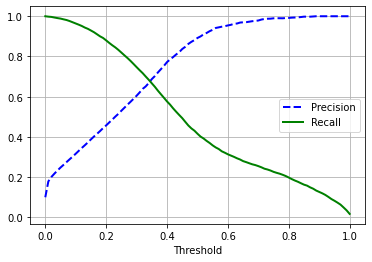

In [129]:
new_run = False
if new_run == True:
    y_scores = cross_val_predict(rfc_clf, X_train, y_train_6, cv=3, method="decision_function")
    joblib.dump(y_scores,'saved_var/y_scores')
else:
    y_scores = joblib.load('saved_var/y_scores')

# Plot precision,  recall curves
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_6, re_score)
let_plot = True
if let_plot:
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend() 
    plt.grid(True)
    plt.xlabel("Threshold")   
    
thres_value = 100
thres_id = np.min(np.where(thresholds >= thres_value))
precision_at_thres_id = precisions[thres_id] 
recall_at_thres_id = recalls[thres_id] 
if let_plot:
    plt.plot([thres_value, thres_value], [0, precision_at_thres_id], "r:")    
    plt.plot([thres_value], [precision_at_thres_id], "ro")                            
    plt.plot([thres_value], [recall_at_thres_id], "ro")            
    plt.text(thres_value, 0, thres_value)    
    plt.text(thres_value, precision_at_thres_id, np.round(precision_at_thres_id,3))                            
    plt.text(thres_value, recall_at_thres_id, np.round(recall_at_thres_id,3)) 
    plt.savefig("thres_value_3000_Ran")    
    plt.show()



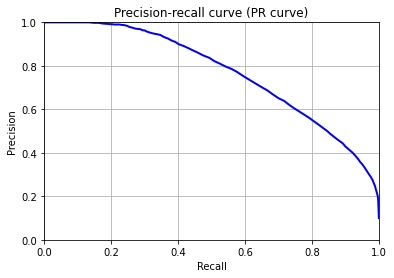

In [130]:

# 3.6.3. Precision vs recall curve (Precision-recall curve)
if let_plot:         
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    plt.title("Precision-recall curve (PR curve)")
    plt.savefig("Precision_recall_curv_Ran")   
    plt.show()


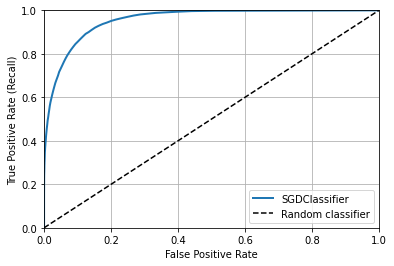

In [131]:

# 3.7.1. Compute FPR, TPR for the SGDClassifier
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_6, re_score)

# 3.7.2. Compute FPR, TPR for a random classifier (make prediction randomly)
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier(strategy="uniform")
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_6, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]
fprr, tprr, thresholdsr = roc_curve(y_train_6, y_scores_dmy)

# 3.7.3. Plot ROC curves
if let_plot:
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot(fprr, tprr, 'k--') # random classifier
    #plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal: random classifier
    plt.legend(['SGDClassifier','Random classifier'])
    plt.grid(True)        
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate (Recall)')    
    plt.show()

# 3.8. Compute Area under the curve (AUC) for ROC
# Info: 
#   A random classifier: ROC AUC = 0.5.
#   A perfect classifier: ROC AUC = 1.
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_train_6, re_score)
    
# 3.9. ROC vs PR curve: when to use?
#   PR curve: focus the false positives (ie. u want high precision)
#   ROC: focus the false negatives (ie. u want high recall)
print('\n')


array([0.00000000e+00, 1.66666667e-04, 1.66666667e-04, ...,
       9.99833333e-01, 1.00000000e+00, 1.00000000e+00])